In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/firstexamegypt/FirstExam.csv


In [25]:
# reading file
firstExam=pd.read_csv("/kaggle/input/firstexamegypt/FirstExam.csv")
firstExam.head()

,desk_no,name,schoolName_Arabic,schoolName_English,administration_Arabic,administration_English,government_Arabic,government_English,branch,Percentage,...,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics,gender
0,102300,احمد محمد احمد محمود ابوالقاسم,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,23,20,unscheduled,M
1,102301,احمد محمد عبدالصادق سلامه,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,23,23,unscheduled,M
2,102302,ادهم اشرف عبدالهادي معاذ,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,17,14,unscheduled,M
3,102303,بيير جون نبيل غالي سعد,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,21,22,unscheduled,M
4,102304,رامي محمود عبدالمنعم شحاته,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,19,21,unscheduled,M


In [26]:
newdf1= firstExam[['chemistry', 'gender','branch']] # making new dataframe by selected column
newdf2 = newdf1[(newdf1.branch !='undefined')] # filtering out 'undefined'
newdf3= newdf2[['chemistry', 'gender']] # making new dataframe by taking Percentage and group column
newdf4 = newdf3[(newdf3.chemistry != 'unscheduled')]
newdf4['chemistry'] = newdf4['chemistry'].replace(['absent', 'canceled','مؤجل'], 0)                   
newdf4



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,chemistry,gender
3024,30,F
3027,30,M
3030,37,M
3037,38,M
3038,38,F
...,...,...
698187,43,F
698188,53,F
698192,48,M
698193,49,M


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chemistry', ylabel='Density'>

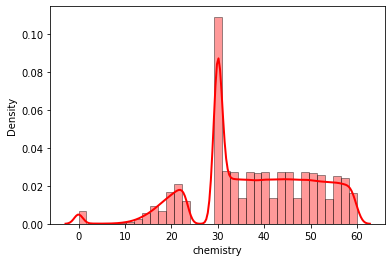

In [27]:
#plotting the dataset
newdf4['chemistry']= (newdf4['chemistry']).astype('float')
sns.distplot(newdf4['chemistry'], hist=True, kde=True,bins=35, color = 'red',hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 2})

In [28]:
newdf4.groupby('gender').mean() # mean by gender

,chemistry
gender,
F,36.513499
M,40.320595


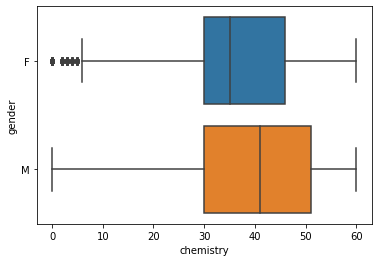

In [29]:
ax= sns.boxplot(x='chemistry',y='gender',data=newdf4)

In [32]:
male_percent=newdf4['chemistry'][newdf4['gender'] == 'M']
female_percent= newdf4['chemistry'][newdf4['gender'] == 'F']

In [43]:
newdf4.groupby('gender').describe()

chemistry                                                   
           count       mean        std  min   25%   50%   75%   max
gender                                                             
F       230795.0  36.513499  12.134731  0.0  30.0  35.0  46.0  60.0
M       192464.0  40.320595  12.510719  0.0  30.0  41.0  51.0  60.0

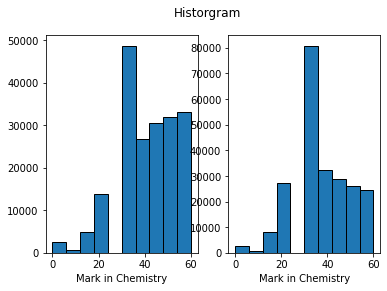

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Historgram')
ax1.hist(male_percent, bins=10, histtype='bar', ec='k') 
ax2.hist(female_percent, bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("Mark in Chemistry")
ax2.set_xlabel("Mark in Chemistry")
plt.show()

In [34]:
stats.levene(male_percent,female_percent, center= 'mean')

LeveneResult(statistic=387.82382218542665, pvalue=2.6939816083127063e-86)

In [35]:
stats.mannwhitneyu(x=male_percent, y=female_percent, alternative = 'greater')

MannwhitneyuResult(statistic=26426267837.5, pvalue=0.0)